# Credi Card Fraud Detection Business_Analyst_Project

# Introduction:
    
>This case study aims to give you an idea of applying EDA in a real business scenario.
In this case study, you will develop a basic understanding of risk analytics in banking and 
financial services and understand how data is used to minimise the risk of losing money while lending to customers

# Explore The Data: What Data Are We Using? ¶

In [113]:
import numpy as np
import pandas as pd
# import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [114]:
# Read in the data

fraud_data = pd.read_csv("application_data.csv")

In [115]:
# Check the number of rows and columns in the data

fraud_data.shape

(307511, 122)

# Explore Continuous Features ¶

In [116]:
# Drop all categorical features

frd_cont = fraud_data.copy()

for i in frd_cont.columns:
    if frd_cont[i].dtype == "object":
        frd_cont.drop(i, axis=1, inplace=True)
frd_cont.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0           -637  ...                 0                 0                 0   
1          -1188  ...                 0                 0                 0   
2           -225  ...                 0                 0                 0   
3          -3039  ...                 0                 0                 0   
4          -3038  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         NaN                        NaN   
4                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 106 columns]

In [117]:
# Look at the general distribution of these features

frd_cont.describe().T

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

In [118]:
# Look at the correlation matrix

frd_cont.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.001500       0.001366  ...          0.000509   
TARGET                        0.078239      -0.044932  ...         -0.007952   
CNT_CHILDREN                  0.330938      -0.239818  ...          0.004031   
AMT_INCOME_TOTAL              0.027261      -0.064223  ...          0.003130   
AMT_CREDIT                   -0.055436      -0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002255       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001336       0.003072  ...         -0.004640   
AMT_REQ_CREDIT_BUREAU_MON     0.001372      -0.034457  ...         -0.001565   
AMT_REQ_CREDIT_BUREAU_QRT    -0.011799       0.015345  ...         -0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071983       0.049988  ...         -0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                             -0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

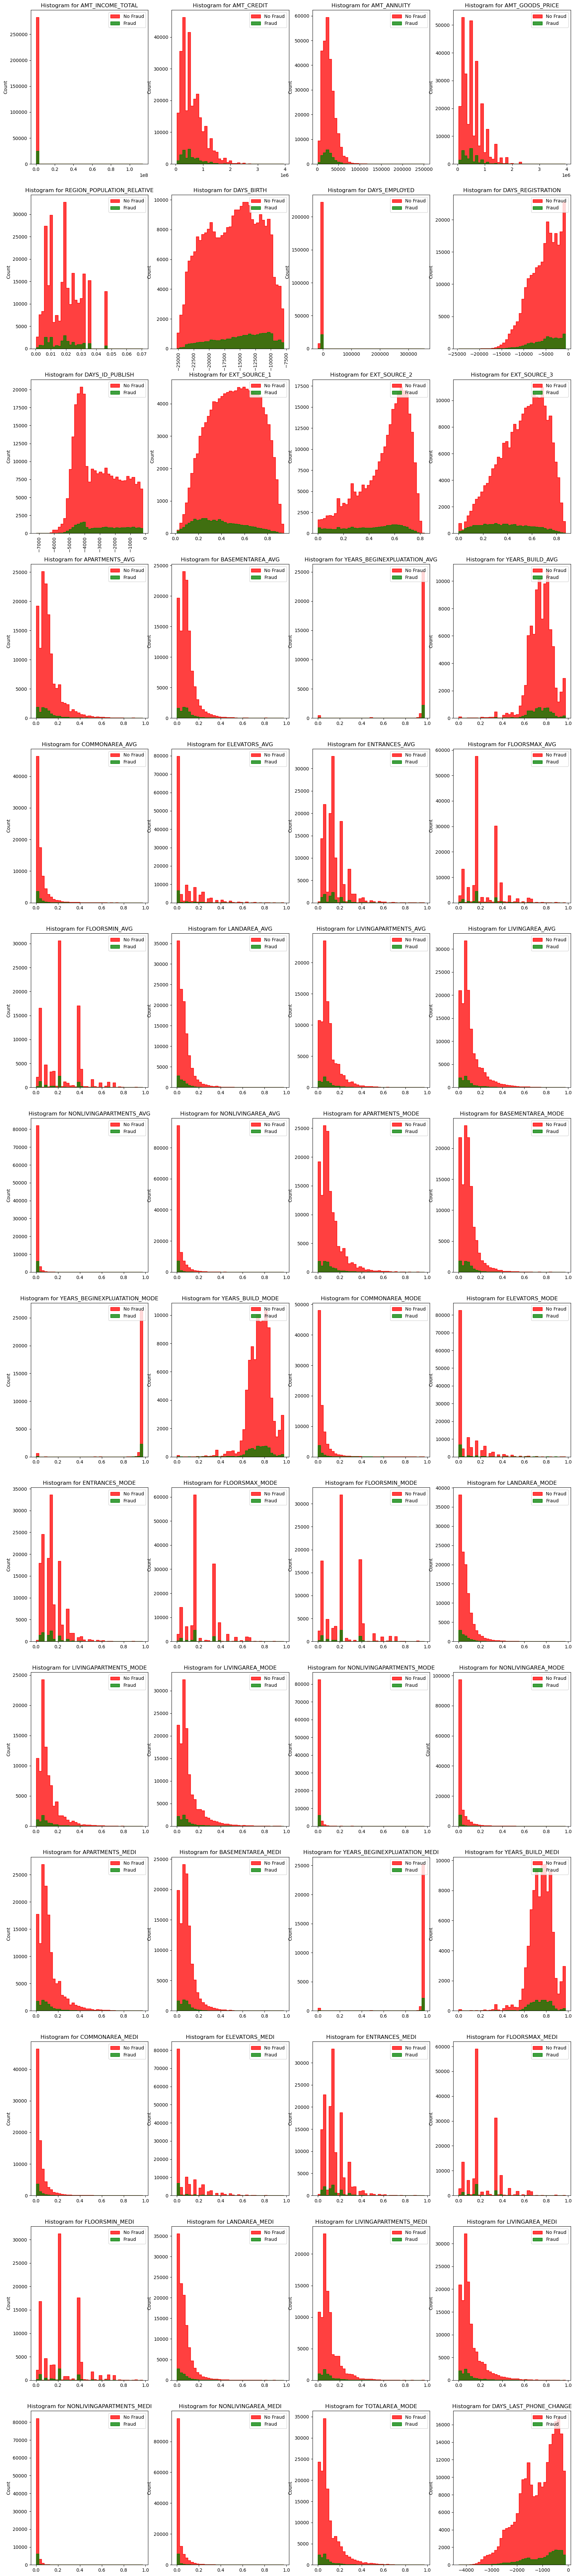

In [119]:
# Plot overlaid histograms for continuous features

cont_feat = ["SK_ID_CURR", "TARGET", "CNT_CHILDREN", "OWN_CAR_AGE",
             "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT",
             "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", 
             "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
             "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
             "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
             "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
             "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
             "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
             "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21",
             "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
             "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
col = 1

plt.figure(figsize=(21, 100))

for i in frd_cont.columns:
    if i not in cont_feat:
        if col < 57:
            plt.subplot(14, 4, col)
            no_frd = list(frd_cont[frd_cont["TARGET"] == 0][i].dropna())
            frd = list(frd_cont[frd_cont["TARGET"] == 1][i].dropna())
            xmin = min(min(no_frd), min(frd))
            xmax = max(max(no_frd), max(frd))
            width = (xmax-xmin) / 40
            sns.histplot(
                x=no_frd,
                bins=np.arange(xmin, xmax, width),
                element="step",
                color="r"
            )
            sns.histplot(
                x=frd,
                bins=np.arange(xmin, xmax, width),
                element="step",
                color="g"
            )
            plt.legend(["No Fraud", "Fraud"])
            plt.title("Histogram for %s" % (i))
            if i in ["DAYS_BIRTH", "DAYS_ID_PUBLISH"]:
                plt.xticks(rotation=90)
        col += 1

# Explore Categorical Features ¶

In [120]:
# Drop all continuous features
frd_cat = fraud_data.copy()

for i in frd_cat.columns:
    if frd_cat[i].dtype != "object":
        frd_cat.drop(i, axis=1, inplace=True)
frd_cat.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government                NaN             NaN   
3  Business Entity Type 3                NaN             NaN   
4                Religion                NaN             NaN   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

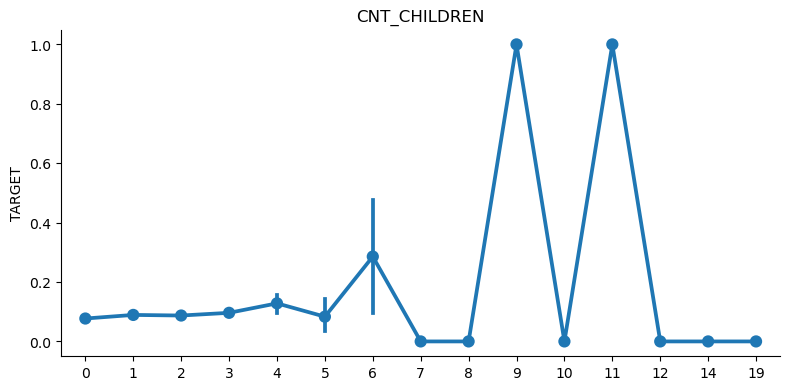

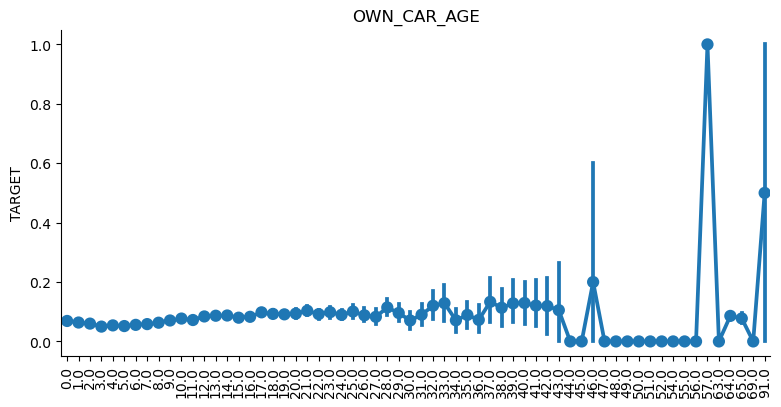

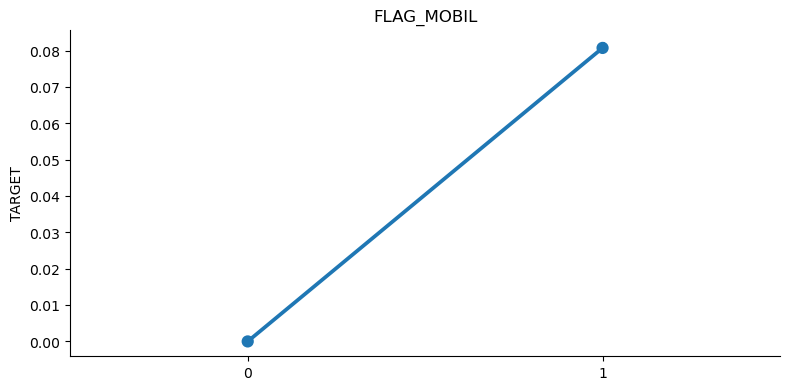

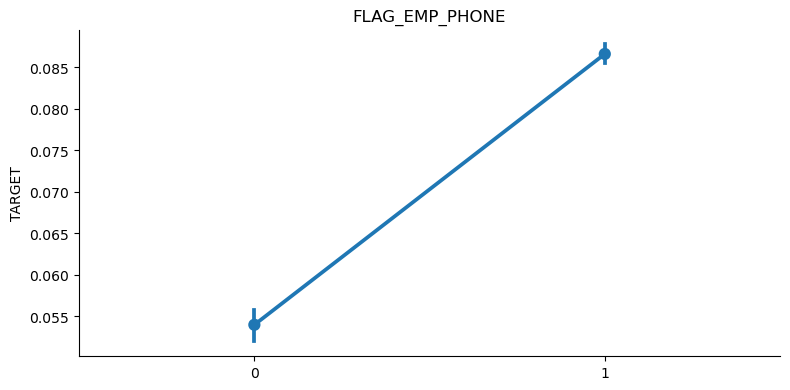

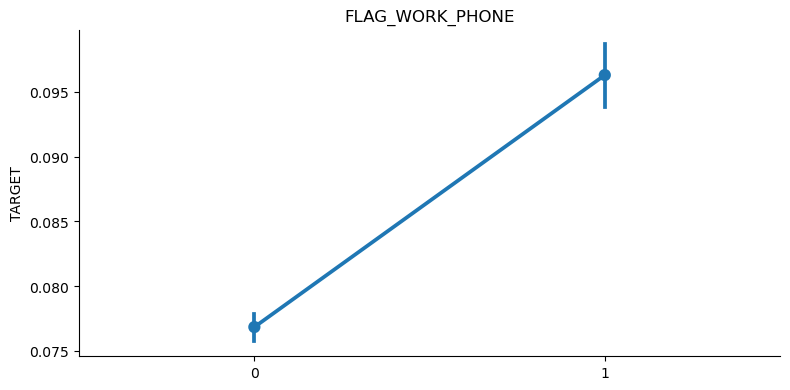

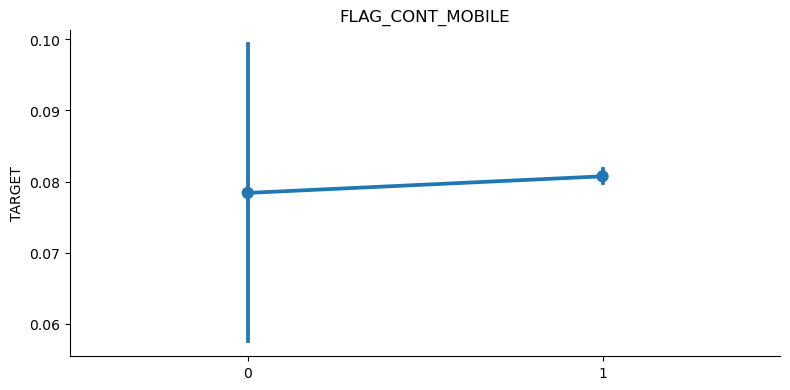

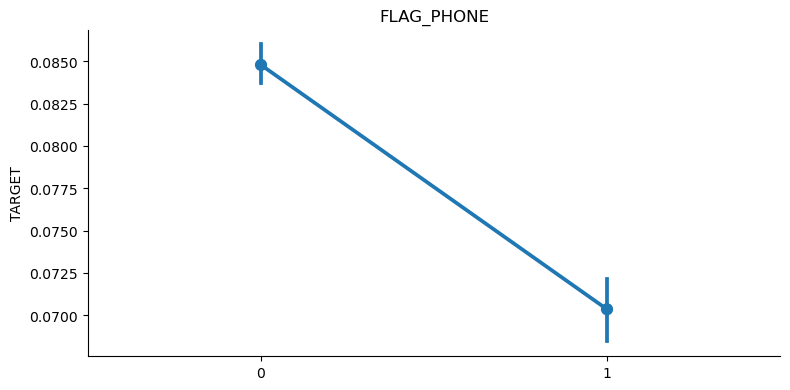

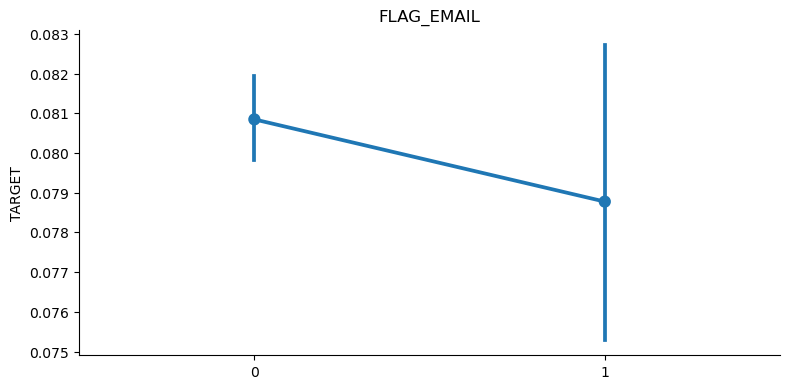

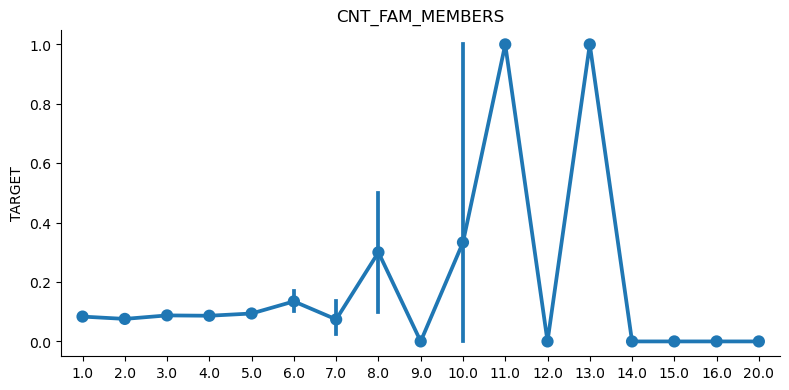

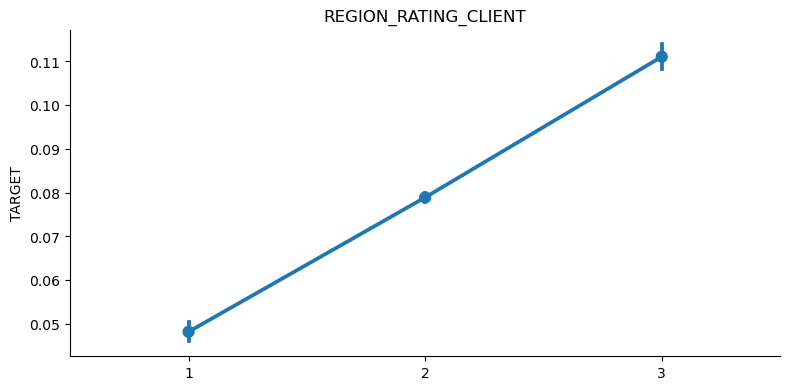

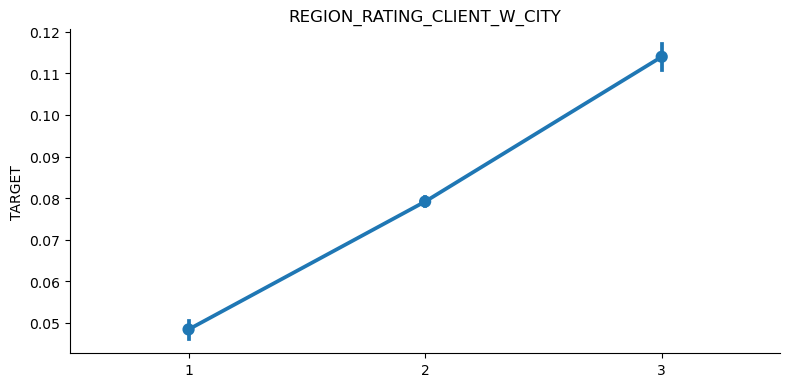

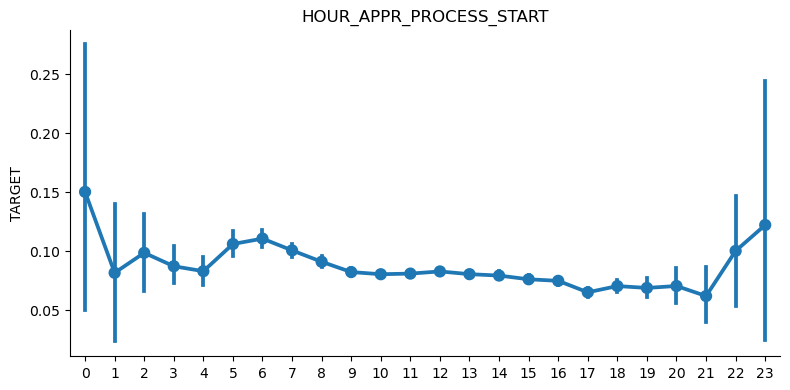

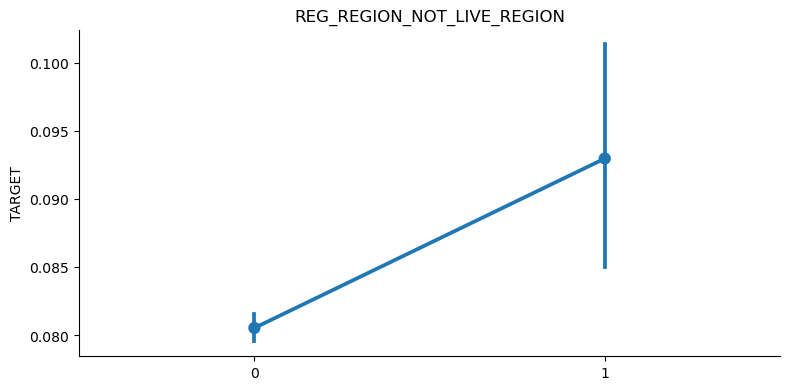

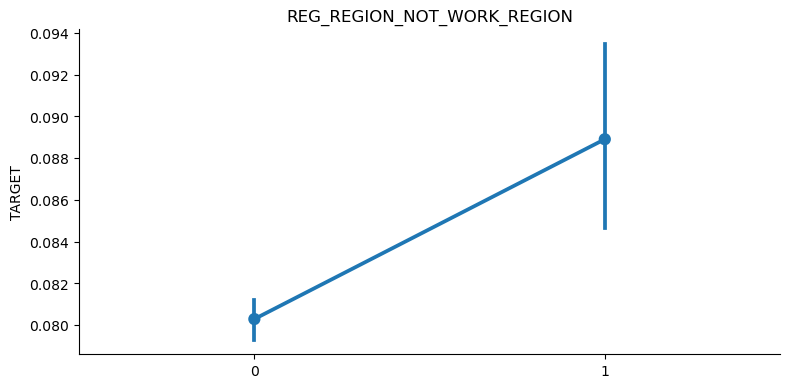

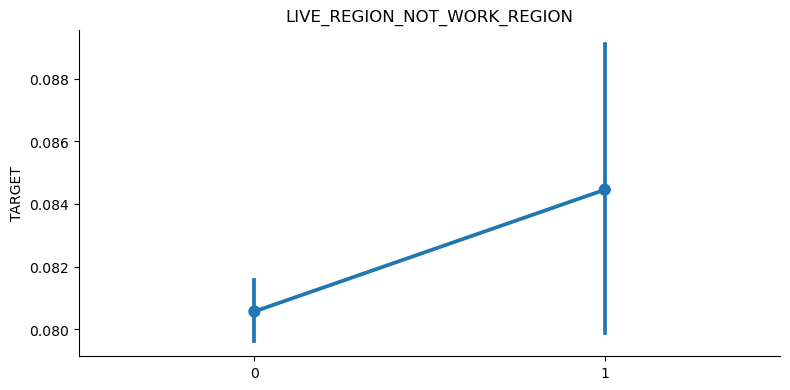

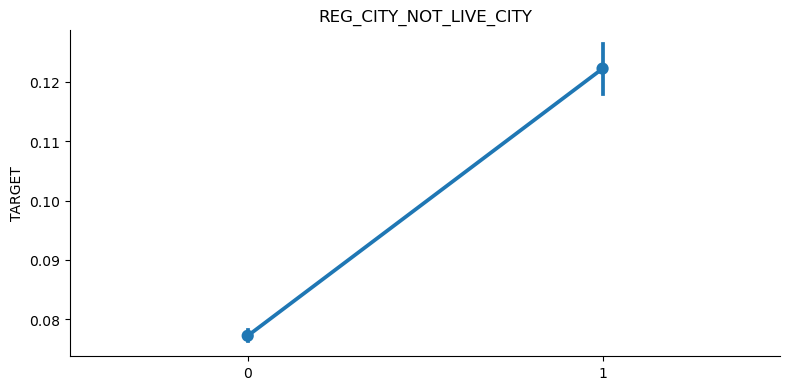

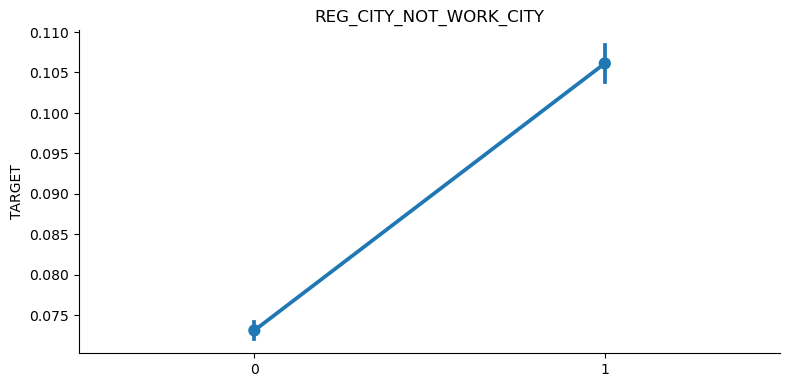

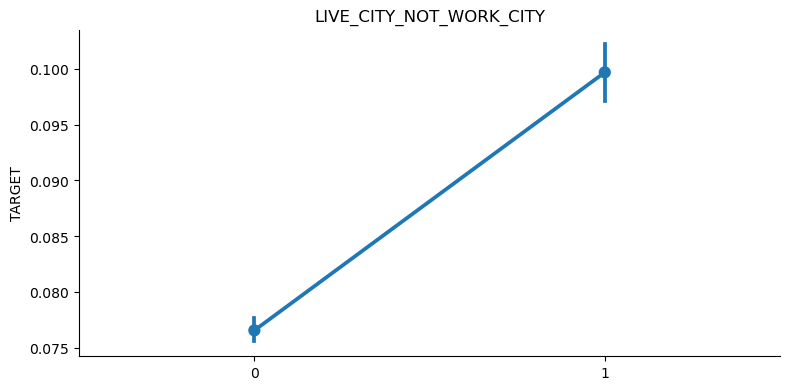

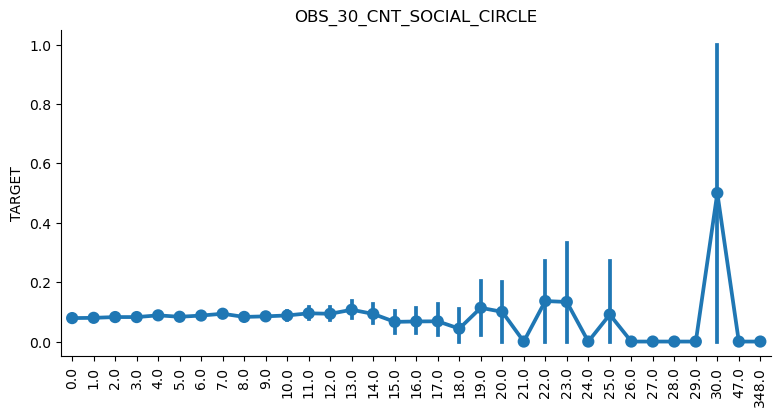

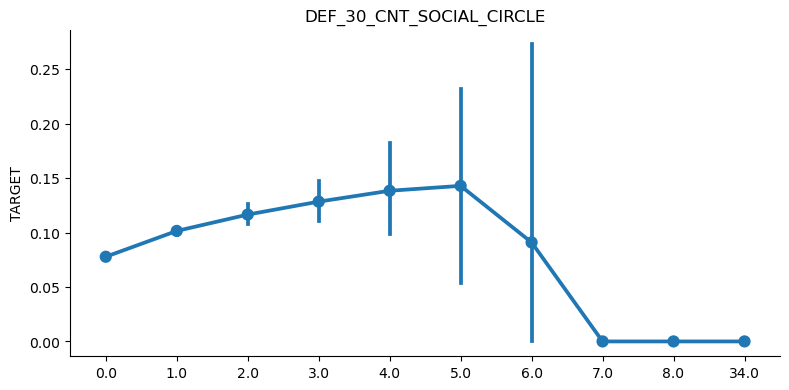

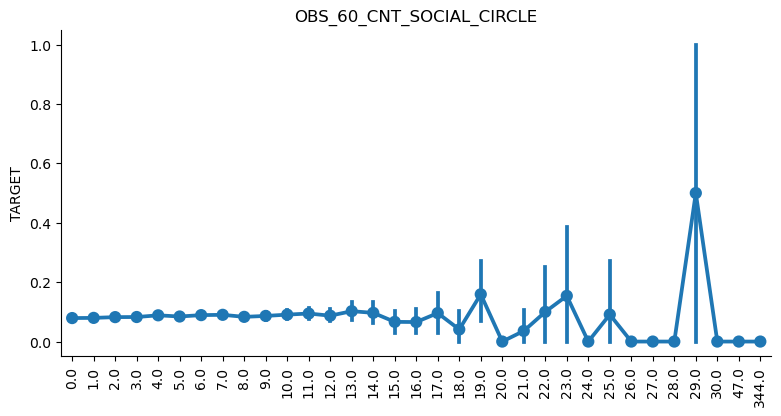

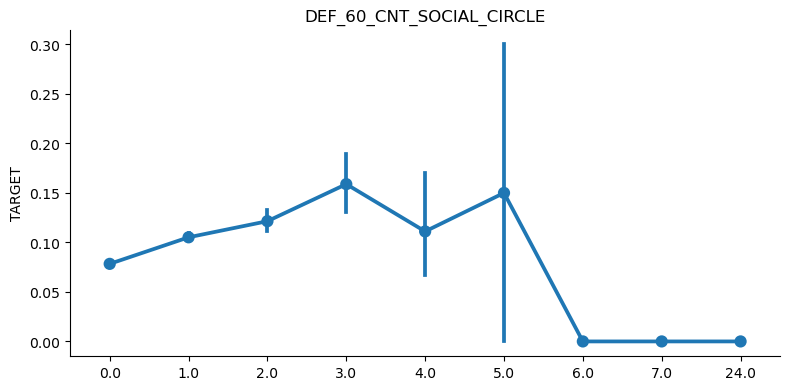

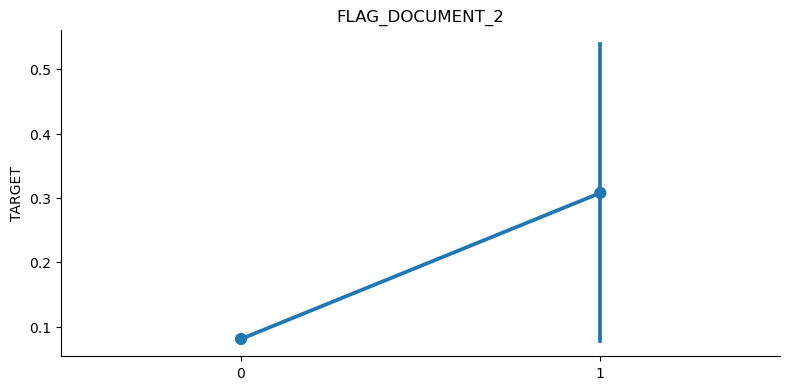

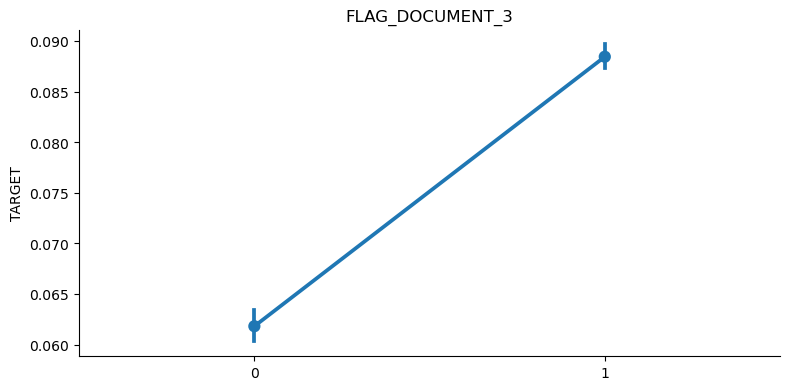

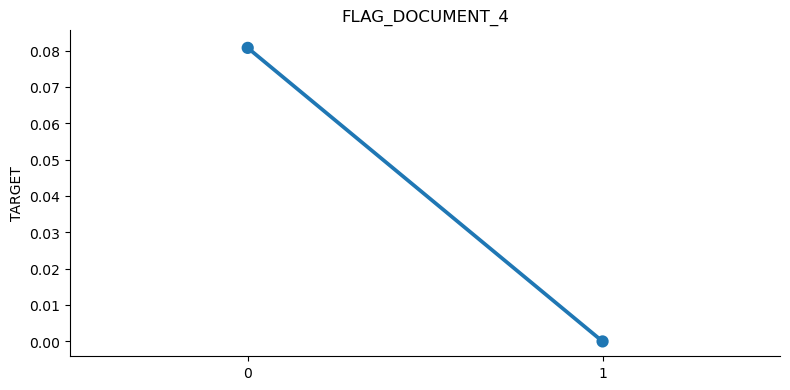

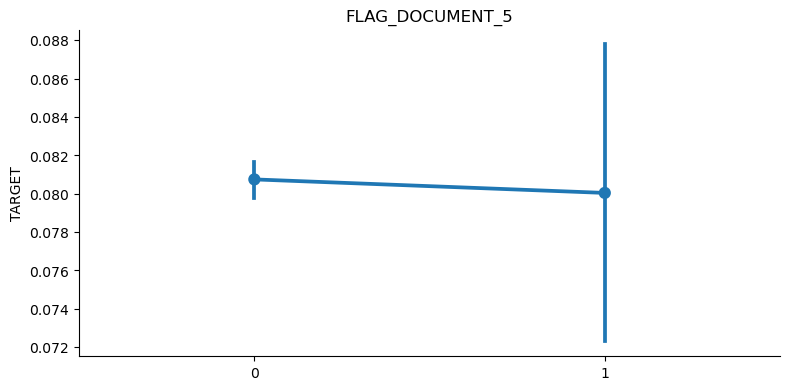

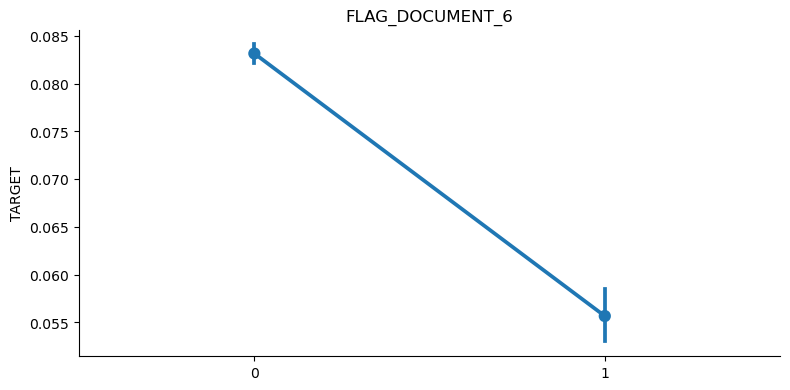

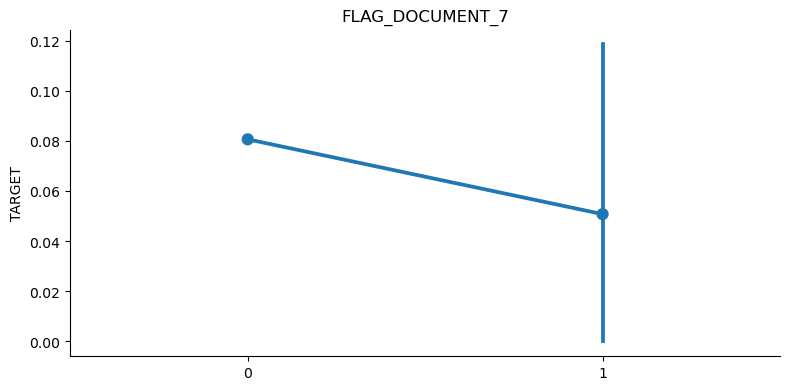

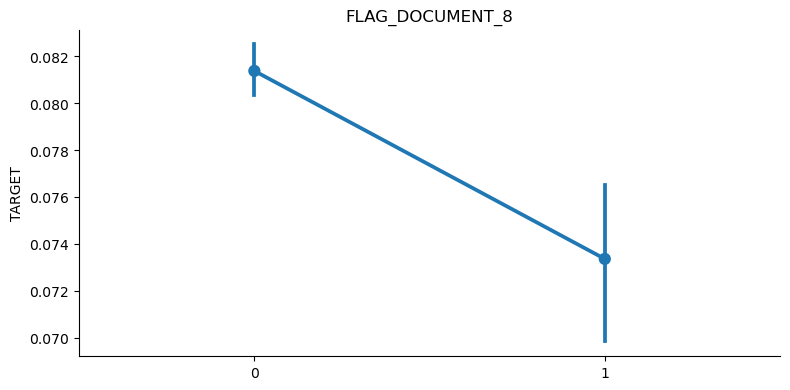

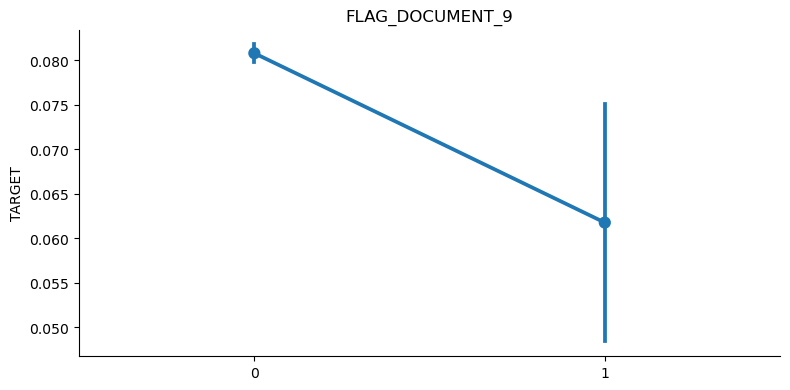

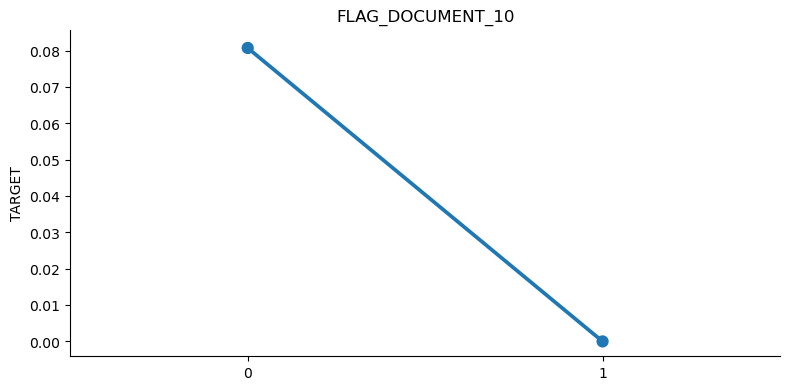

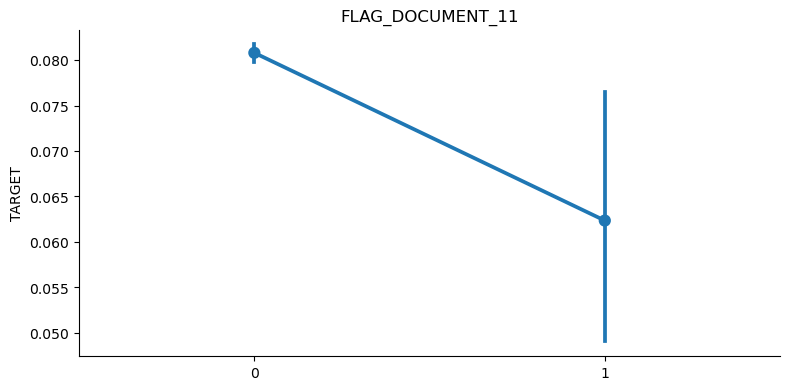

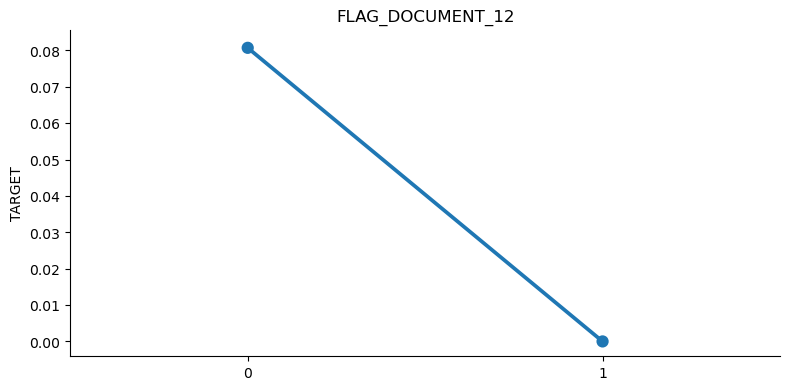

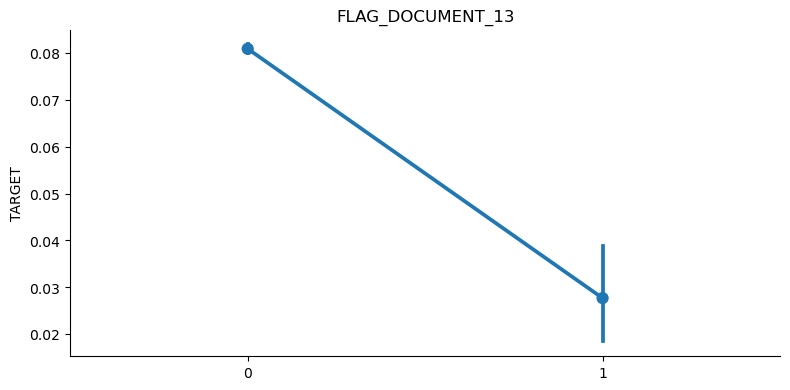

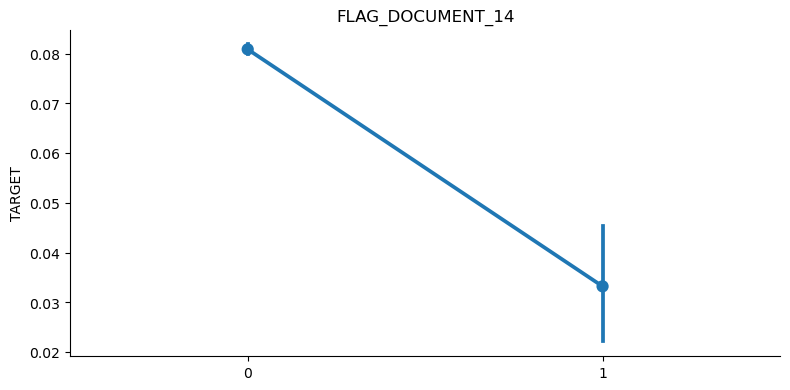

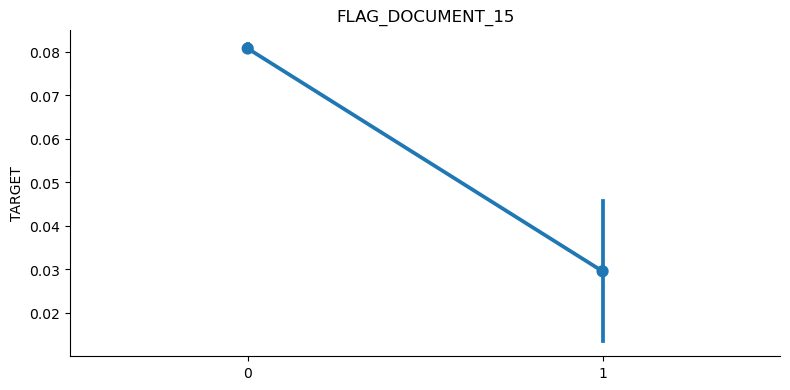

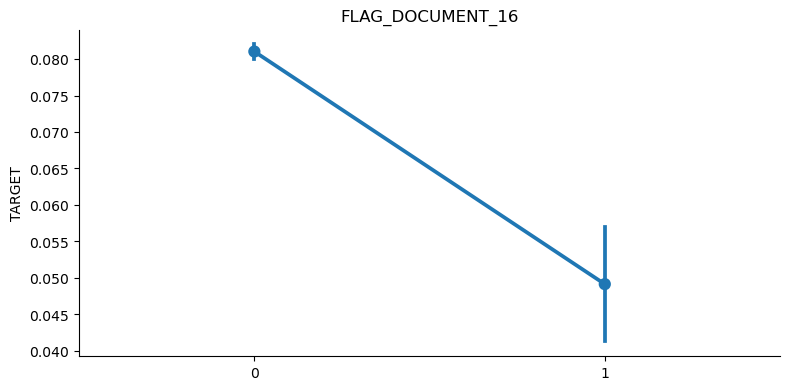

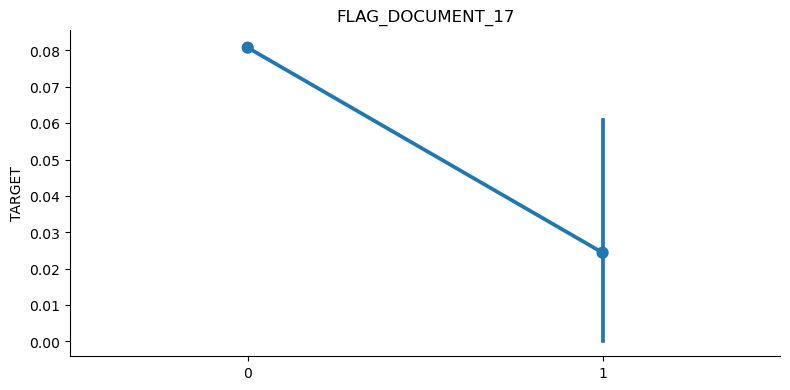

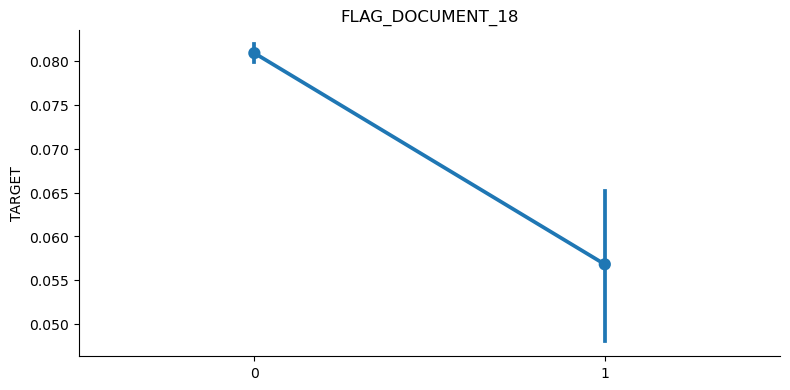

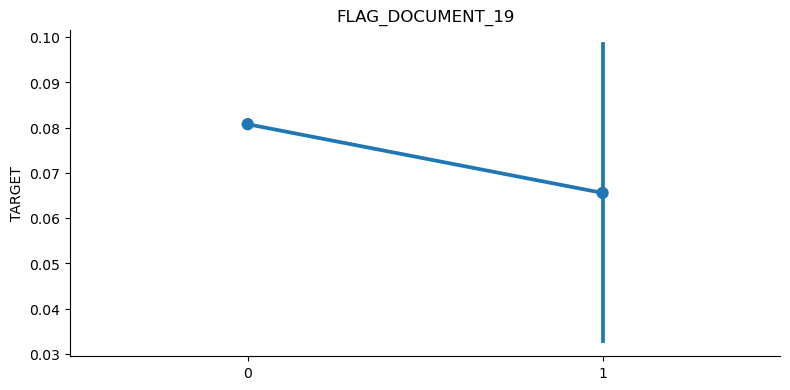

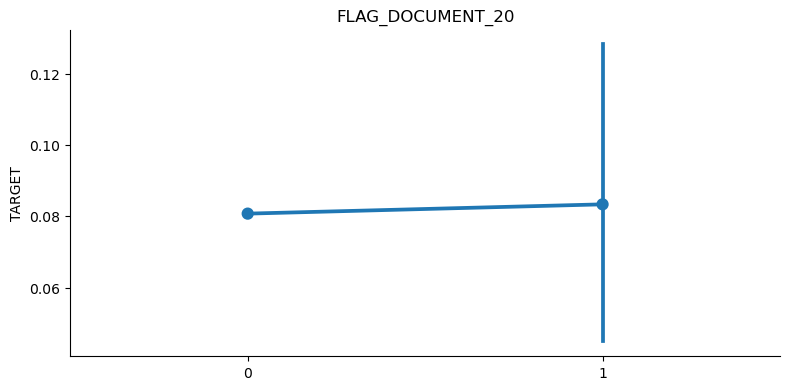

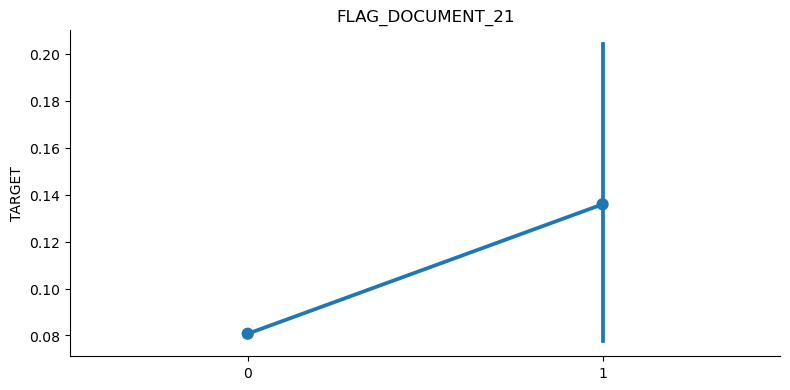

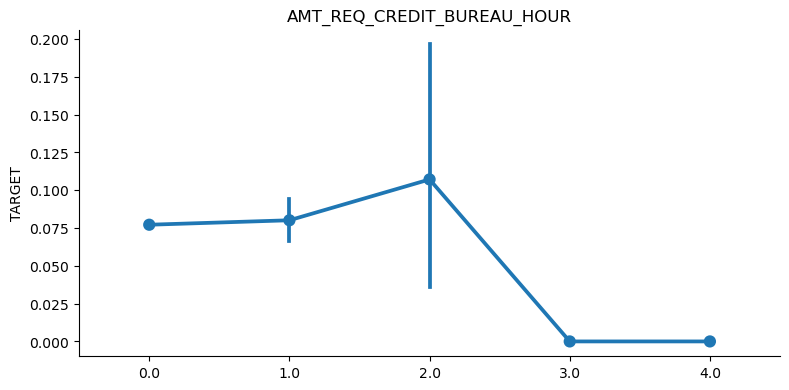

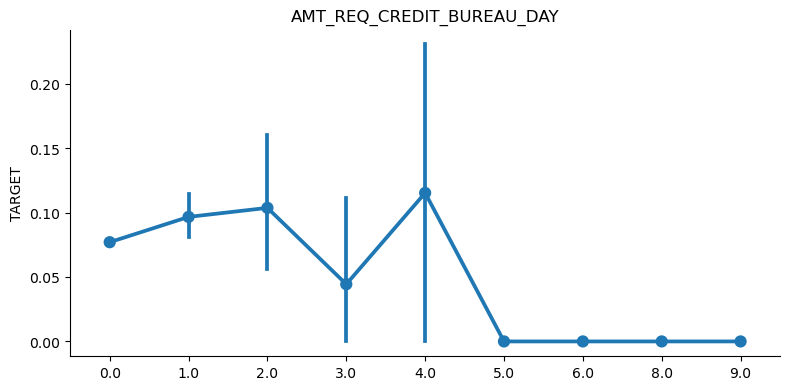

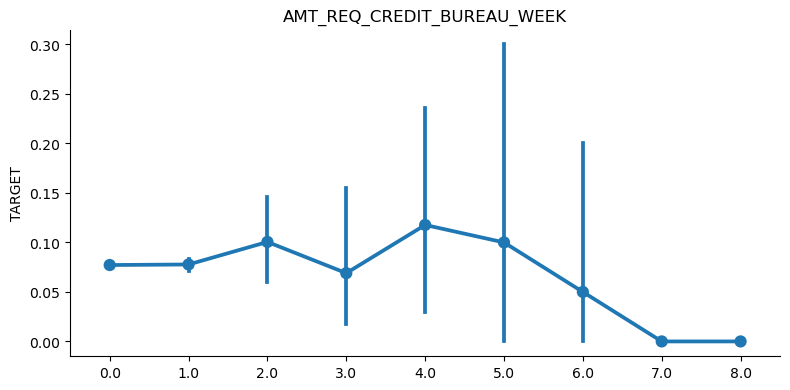

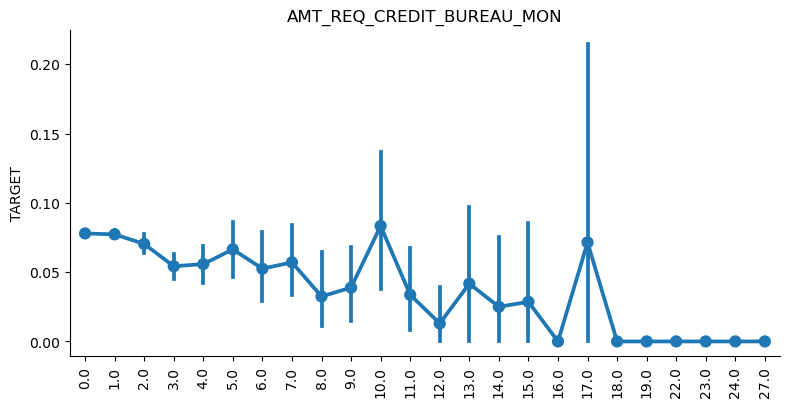

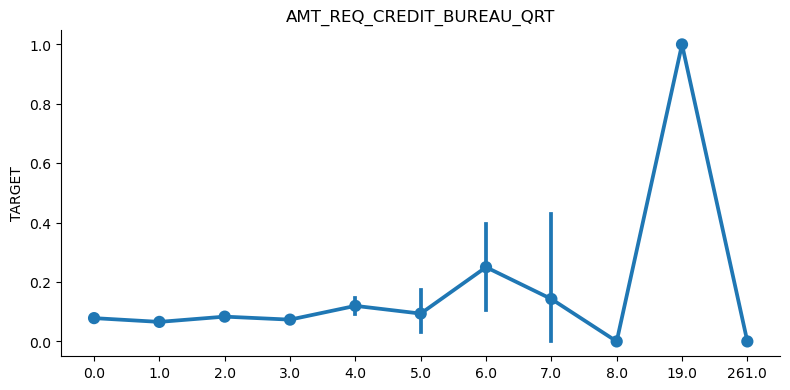

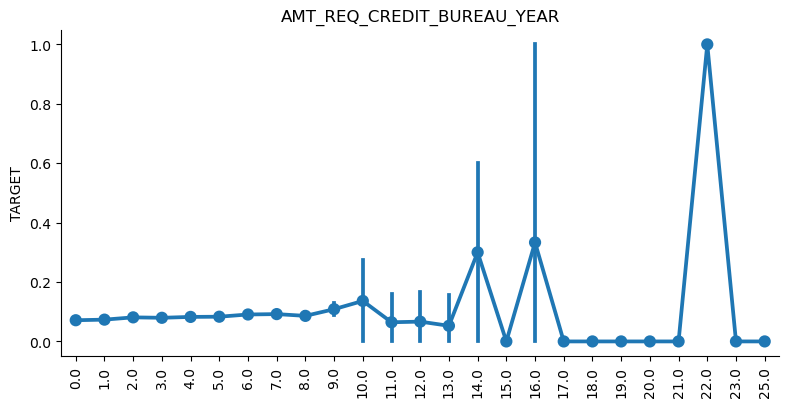

In [121]:
# Generate categorical plots for ordinal features

ord_feat = ["CNT_CHILDREN", "OWN_CAR_AGE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", 
            "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", 
            "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION",
            "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
            "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE",
            "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
            "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", 
            "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", 
            "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
            "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21",
            "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
            "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

for col in ord_feat:
    sns.catplot(
        data=frd_cont,
        x=col,
        y="TARGET",
        height=4,
        aspect=2,
        kind="point"
    ).set(xlabel=None)
    plt.title(col)
    if col in ["OWN_CAR_AGE", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]:
        plt.xticks(rotation=90)

In [122]:
# # Look at the general distribution of these features

frd_cat.describe(include="object").T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
FONDKAPREMONT_MODE           73830  
HOUSETYPE_MODE              150503  
WALLSMATERIAL_MODE           66040  
EMERGENCYSTATE_MODE         159428

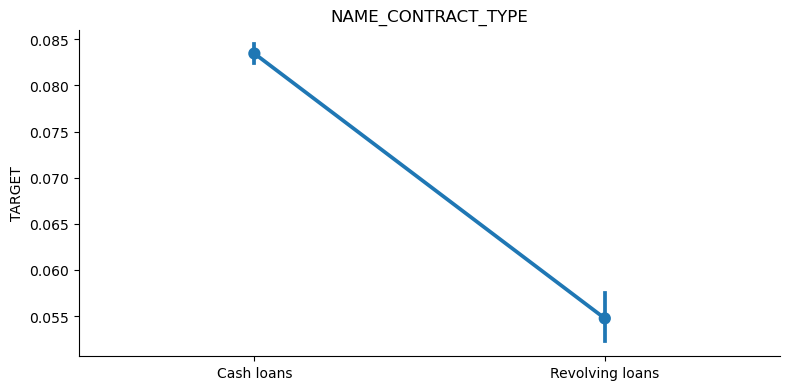

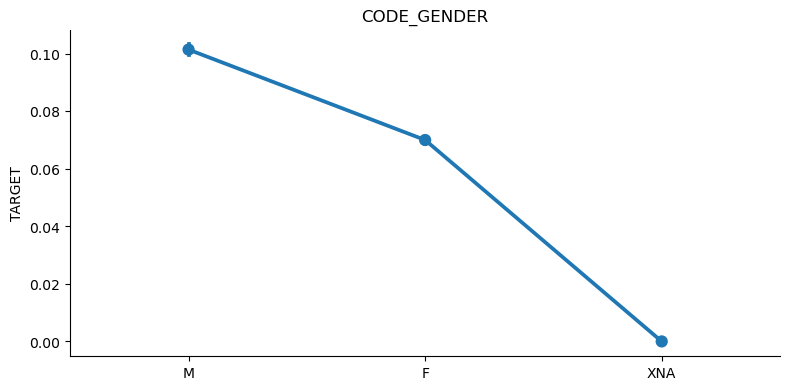

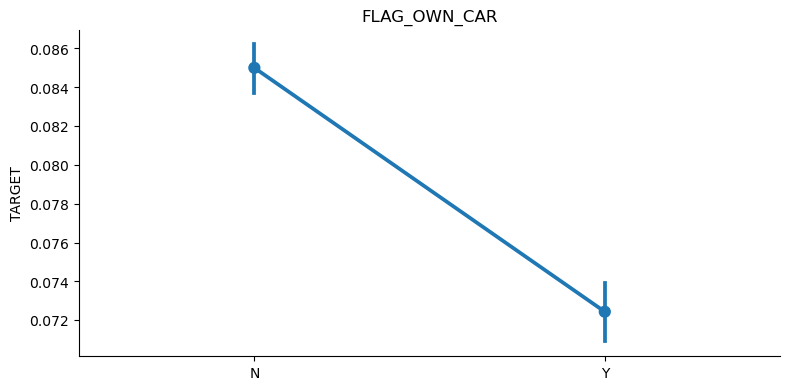

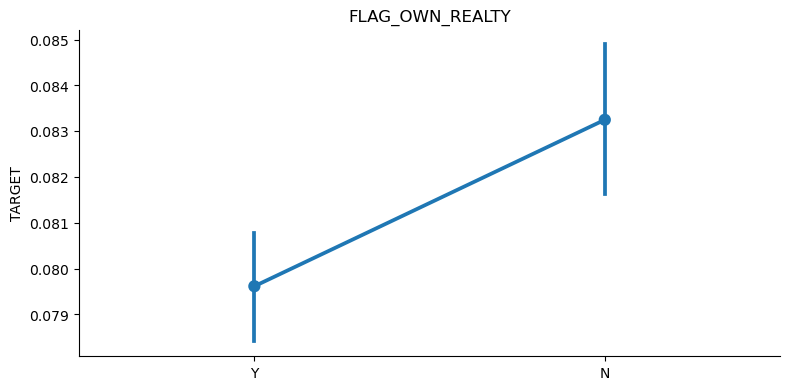

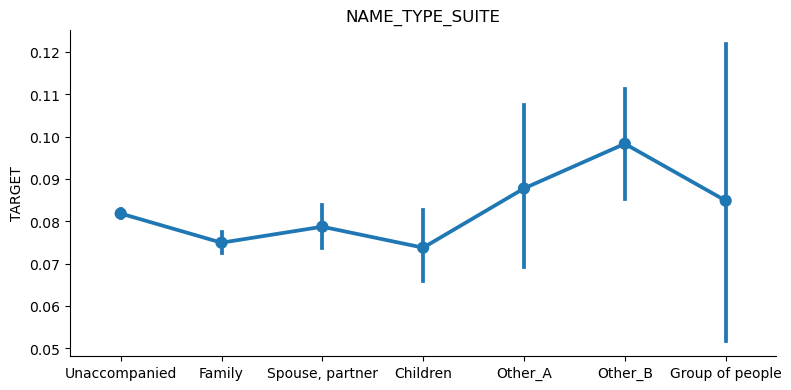

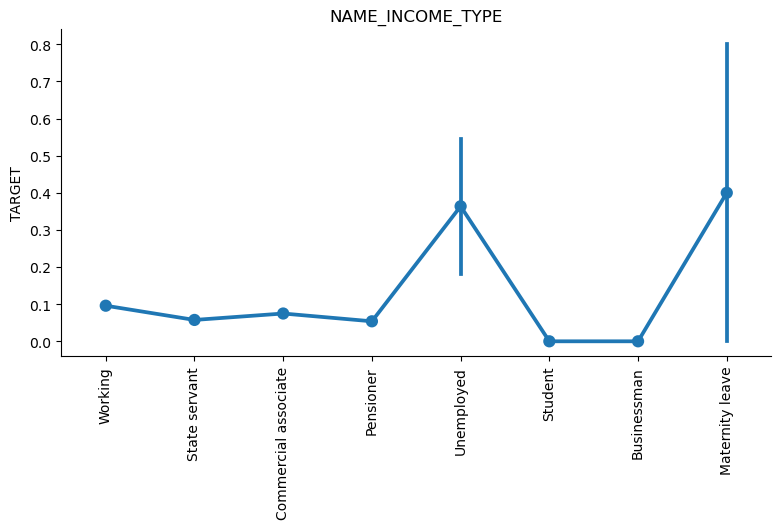

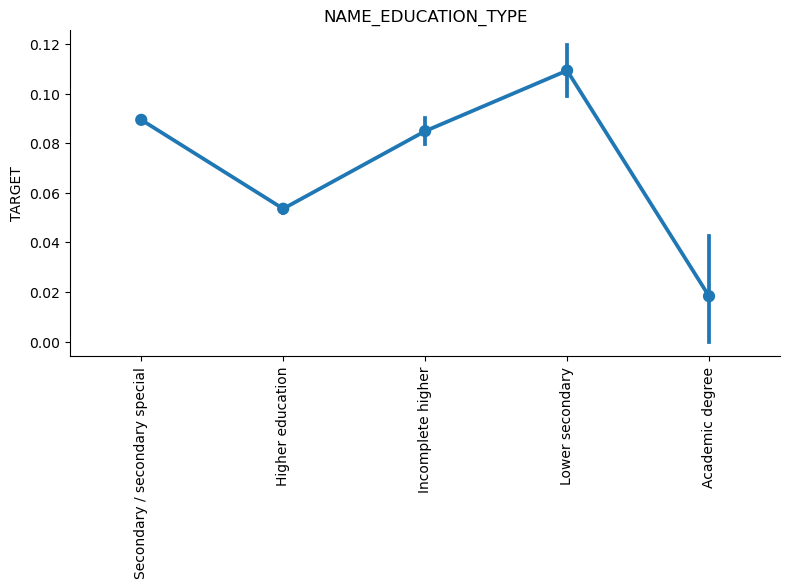

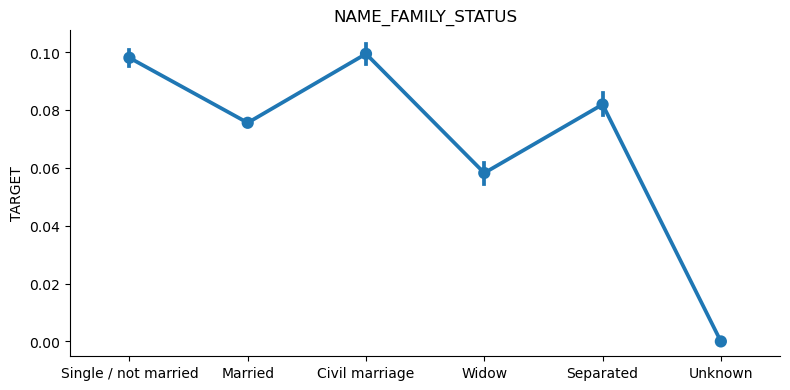

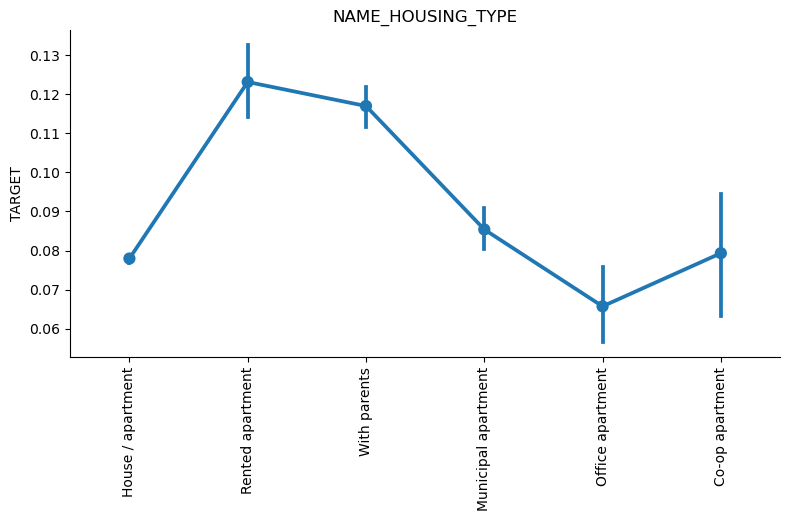

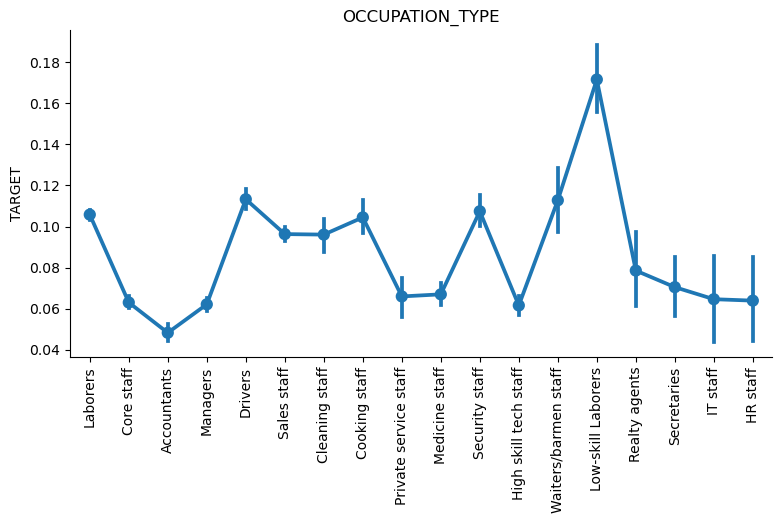

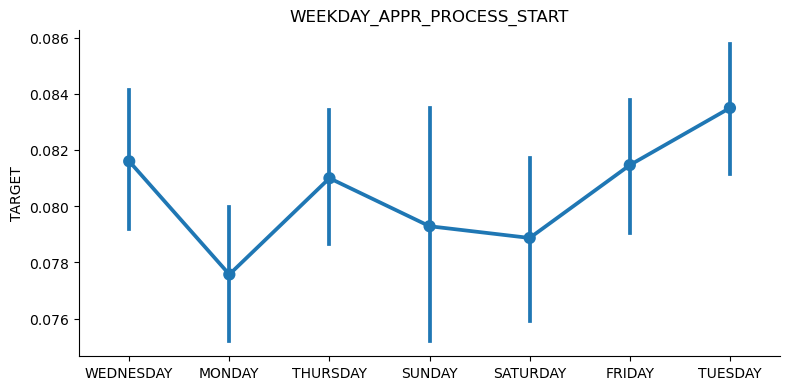

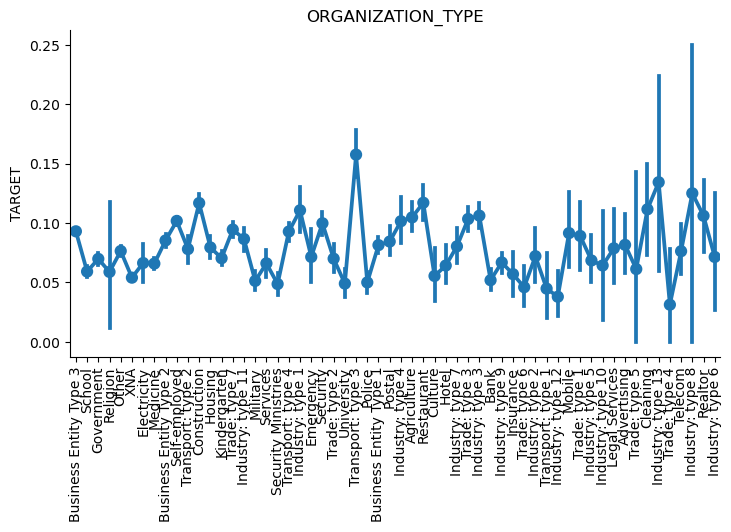

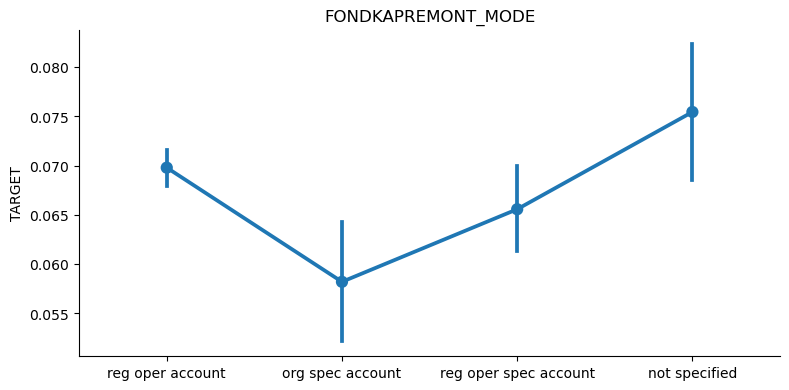

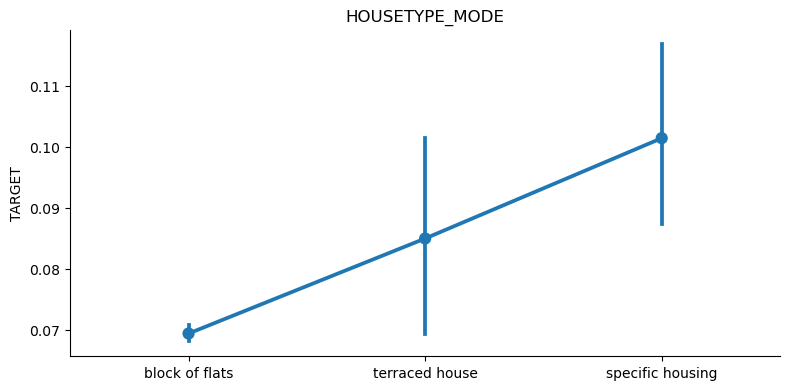

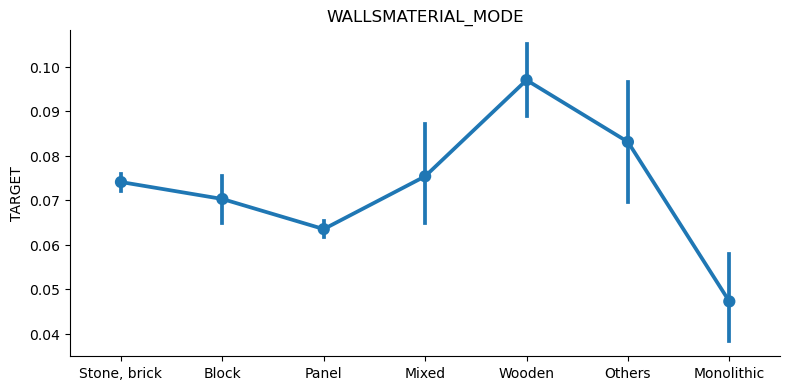

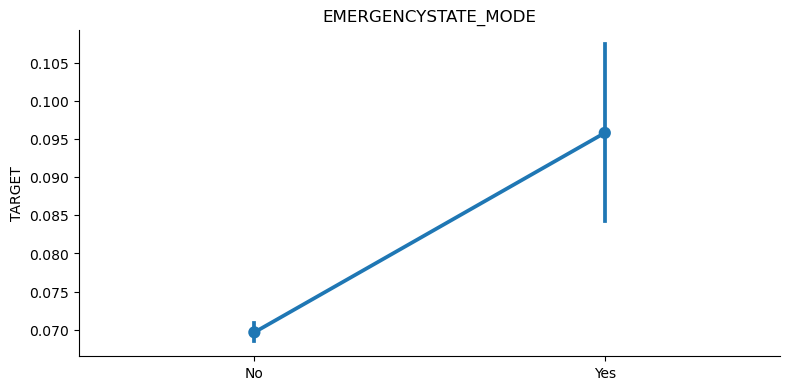

In [123]:
# Generate categorical plots for features
for col in frd_cat.columns:
    sns.catplot(
        data=fraud_data,
        x=col,
        y="TARGET",
        height=4,
        aspect=2,
        kind="point"
    ).set(xlabel=None)
    plt.title(col)
    if col in ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE"]:
        plt.xticks(rotation=90)

# II Data Cleaning ¶

In [124]:
# Check where we have missing values

fraud_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# Clean Continuous Variables ¶

    Fill in missing values
    Drop irrelevant/repetitive variables

In [125]:
# Fill in missing values using IterativeImputer

imp = IterativeImputer()
imp.fit(frd_cont)
fraud = pd.DataFrame(imp.transform(frd_cont), columns=frd_cont.columns)

# Drop Unnnecessary Variables ¶


In [126]:
# Drop irrelevant continuous variable
fraud.drop(["SK_ID_CURR"], axis=1, inplace=True)

# Clean Categorical Variables
    Fill in missing values
    Create a new dataframe
    Converting dtype

In [127]:
# Fill in missing values

obj_mode = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE",
            "EMERGENCYSTATE_MODE"]

for i in obj_mode:
    frd_cat[i].fillna(frd_cat[i].mode()[0], inplace=True)

# Create New DataFrame¶


In [128]:
# Combine continuous variables & categorical variables into new dataframe
fraud = pd.concat([fraud, frd_cat], axis=1)

In [129]:
# Converting dtype to 'int64'
int_list = ["TARGET", "CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE",
            "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
            "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", 
            "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
            "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE",
            "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE",
            "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7",
            "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12",
            "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
            "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR",
            "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
            "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

for i in int_list:
    fraud[i] = fraud[i].apply(lambda x: round(x))

# III Data Preparation



# Cap And Floor Data To Remove Outliers

In [130]:
# See where outliers might be an issue
fraud.describe().T

count           mean            std      min  \
TARGET                      307511.0       0.080729       0.272419      0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121      0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279  25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996  45000.0   
AMT_ANNUITY                 307511.0   27108.635371   14493.617072   1615.5   
...                              ...            ...            ...      ...   
AMT_REQ_CREDIT_BUREAU_DAY   307511.0       0.006055       0.103037      0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  307511.0       0.029739       0.190768      0.0   
AMT_REQ_CREDIT_BUREAU_MON   307511.0       0.235338       0.858068      0.0   
AMT_REQ_CREDIT_BUREAU_QRT   307511.0       0.229631       0.744059      0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  307511.0       1.898166       1.746198      0.0   

                                 25%       50%       75%          max  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
AMT_ANNUITY                  16524.0   24903.0   34596.0     258025.5  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       1.0       2.0       3.0         25.0  

[105 rows x 8 columns]

In [131]:
# Cap features
cap_feat = ["TARGET", "CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE", 
            "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", 
            "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START",
            "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
            "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", 
            "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2",
            "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
            "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
            "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", 
            "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
            "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

for feat in fraud.columns:
    if fraud[feat].dtype != "object":
        if feat not in cap_feat:
            fraud[feat].clip(upper=fraud[feat].quantile(.99), inplace=True)

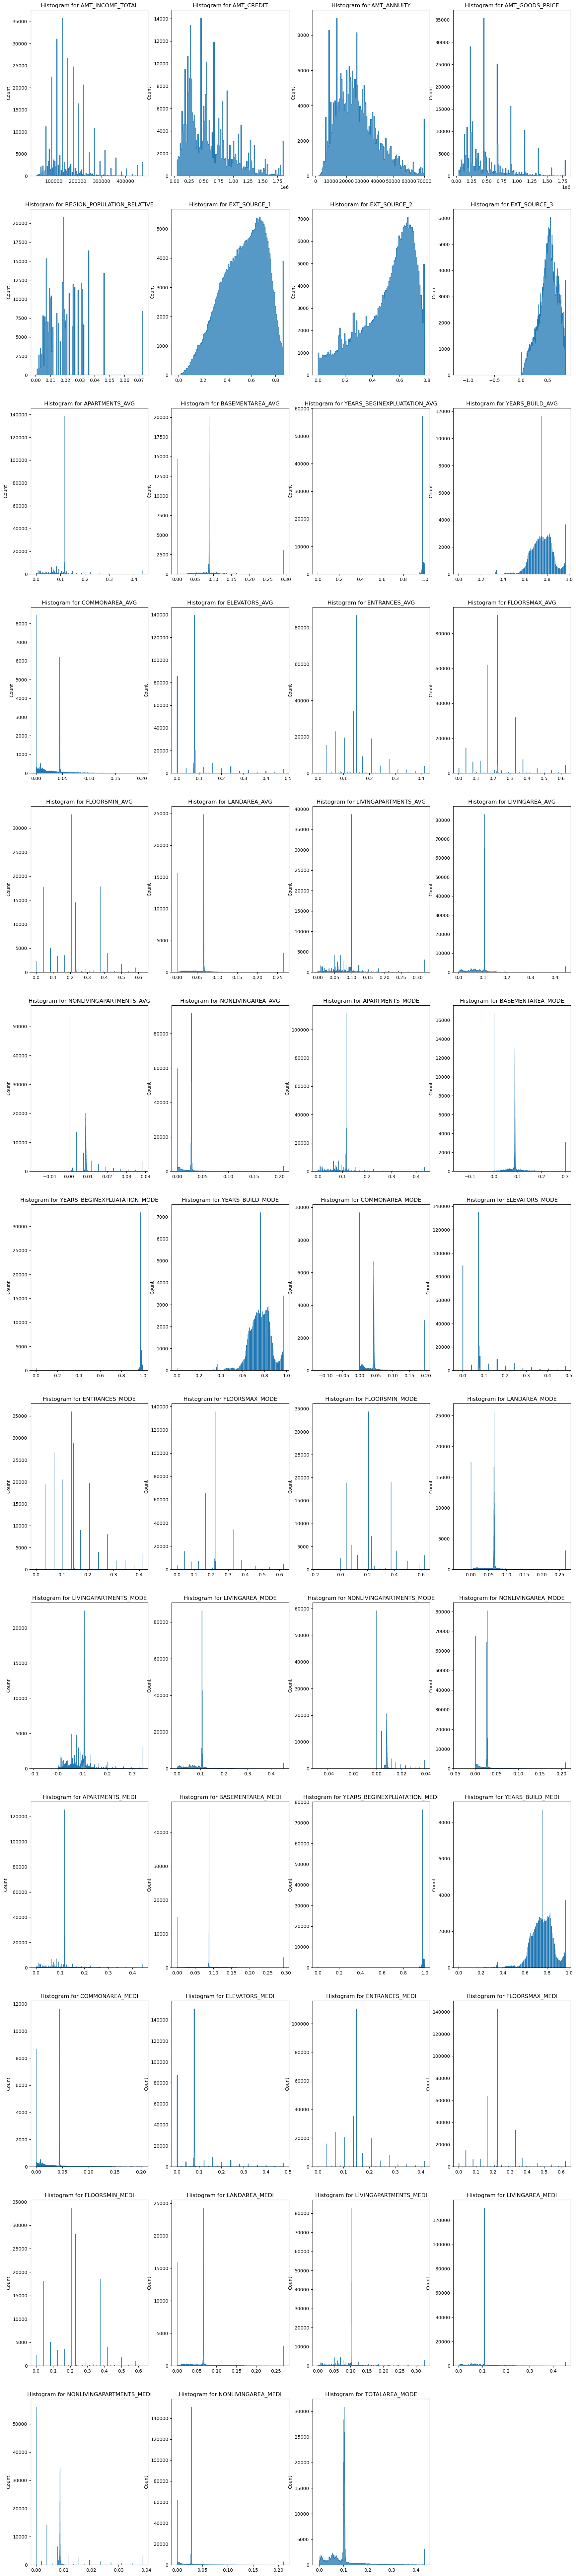

In [132]:
# Plot histogram for each continuous feature to see if a transformation is necessary
cont_feat = ["TARGET", "CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE",
             "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS",
             "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY",
             "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
             "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", 
             "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", 
             "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18",
             "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
             "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
col = 1

plt.figure(figsize=(21, 100))

for feature in fraud.columns:
    if fraud[feature].dtype != "object":
        if feature not in cont_feat:
            if col < 52:
                plt.subplot(13, 4, col)
                sns.histplot(
                    fraud[feature],
                    element="step"
                ).set(xlabel=None)
                plt.title("Histogram for %s" % (feature))
            col += 1

# Convert Categorical Features To Numeric

In [141]:
# # Convert categorical features to numeric levels
# for feature in fraud.columns:
#     if fraud[feature].dtype == "object":
#         target_encoder =feature.TargetEncoder()
#         fraud[feature] = target_encoder.fit_transform(fraud[feature], fraud["TARGET"])

# Standardize Features

In [151]:
# Fit the scaler on the training data
# scaler = StandardScaler()
# scaler.fit(X_train)

# Evaluate Models On The Validation Set ¶


In [1]:
# # Evaluate all of our models on the validation set

# models = [lr,dt, rf, ada, gb, xgb, lgbm, mlp, sc]
# val_set = pd.DataFrame()

# for mdl in models:
#         start = time()
#         pred = mdl.predict(X_val[features])
#         end = time()
#         temp = pd.DataFrame(
#                 {
#                     "Accuracy": ("%0.3f" % (accuracy_score(y_val, pred))),
#                     "F1": ("%0.3f" % (f1_score(y_val, pred))),
#                     "Precision": ("%0.3f" % (precision_score(y_val, pred))),
#                     "Recall": ("%0.3f" % (recall_score(y_val, pred))),
#                     "Latency": ("%0.1fms" % ((end-start) * 1000))
#                 },
#             index=[str(mdl).split("Classifier")[0].split("(")[0]]
#         )
#         val_set = pd.concat([val_set, temp])
# val_set

# Evaluate Best Model On Test Set ¶

In [153]:
# # Evaluate our final model on the test set
# test_set = pd.DataFrame()

# for mdl in models:
#         start = time()
#         pred = mdl.predict(X_test[features])
#         end = time()
#         temp = pd.DataFrame(
#                 {
#                     "Accuracy": ("%0.3f" % (accuracy_score(y_test, pred))),
#                     "F1": ("%0.3f" % (f1_score(y_test, pred))),
#                     "Precision": ("%0.3f" % (precision_score(y_test, pred))),
#                     "Recall": ("%0.3f" % (recall_score(y_test, pred))),
#                     "Latency": ("%0.1fms" % ((end-start) * 1000))
#                 },
#             index=[str(mdl).split("Classifier")[0].split("(")[0]]
#         )
#         test_set = pd.concat([test_set, temp])
# test_set

# Conclusion ¶

# Results:

> Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

> Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

>The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are
strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.